# Neural network for handwritten digit classification with code basics 

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd


In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

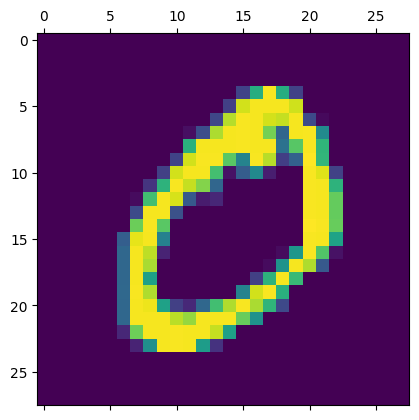

In [7]:
plt.matshow(X_train[1])

In [8]:
y_train[1]

0

In [9]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train=X_train/255
X_test=X_test/255

In [12]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened =X_test.reshape(len(X_test), 28*28)

In [13]:
X_test_flattened.shape

(10000, 784)

In [14]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')])

model.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4680 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3037 - accuracy: 0.9160
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2833 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2728 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2665 - accuracy: 0.9254


In [16]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.2682 - accuracy: 0.9256


[0.26822206377983093, 0.925599992275238]

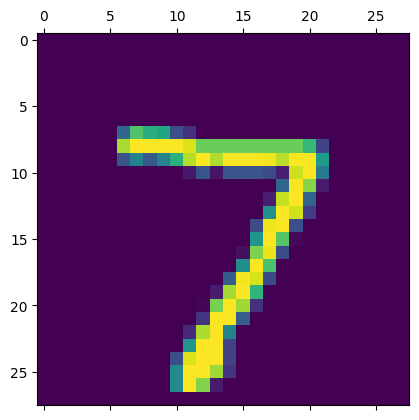

In [17]:
plt.matshow(X_test[0])

In [18]:
y_predicted= model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 2s 5ms/step


array([1.6055355e-02, 3.5639491e-07, 6.7519769e-02, 9.7445202e-01,
       2.9358605e-03, 9.0421163e-02, 1.6692302e-06, 9.9983793e-01,
       9.0480901e-02, 7.2748846e-01], dtype=float32)

In [19]:
np.argmax(y_predicted[0])

7

In [20]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [21]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [22]:
cm = tf.math.confusion_matrix(labels=y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    3,    2,    0,    4,    7,    3,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   4,    9,  939,   15,    8,    2,   11,   10,   30,    4],
       [   3,    0,   21,  934,    0,   15,    2,   10,   15,   10],
       [   1,    1,    6,    1,  907,    0,   12,    3,   10,   41],
       [  10,    2,    5,   49,    9,  753,   19,    8,   30,    7],
       [  11,    3,    8,    1,    7,   11,  913,    2,    2,    0],
       [   1,    5,   23,    8,    9,    0,    0,  946,    2,   34],
       [   6,    9,    8,   27,    8,   23,   11,   11,  861,   10],
       [   9,    7,    2,   13,   26,    4,    0,   16,    5,  927]])>

In [23]:
#pip install seaborn

Text(95.72222222222221, 0.5, 'Truth')

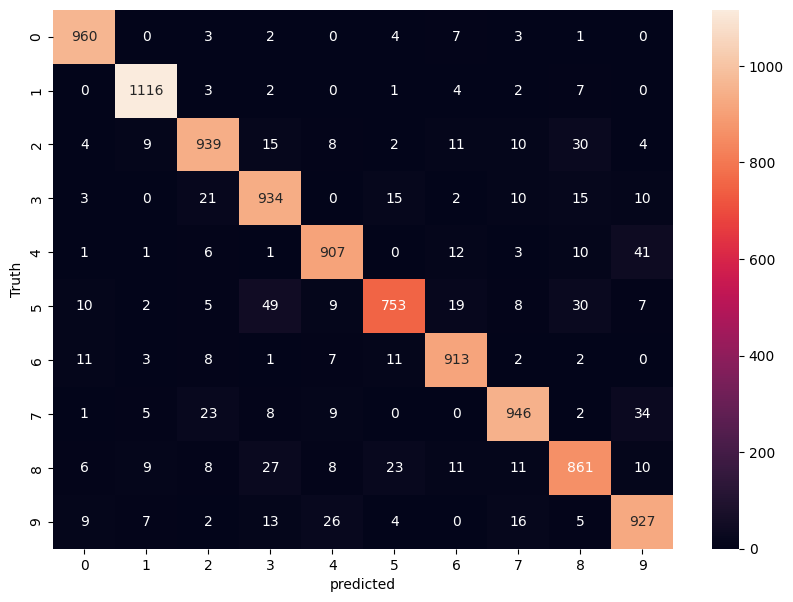

In [24]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [25]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2701 - accuracy: 0.9242
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1185 - accuracy: 0.9651
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0845 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0647 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0514 - accuracy: 0.9838


In [26]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 3s 6ms/step - loss: 0.0785 - accuracy: 0.9763


[0.07854912430047989, 0.9763000011444092]

313/313 [==============================] - 3s 6ms/step


Text(95.72222222222221, 0.5, 'Truth')

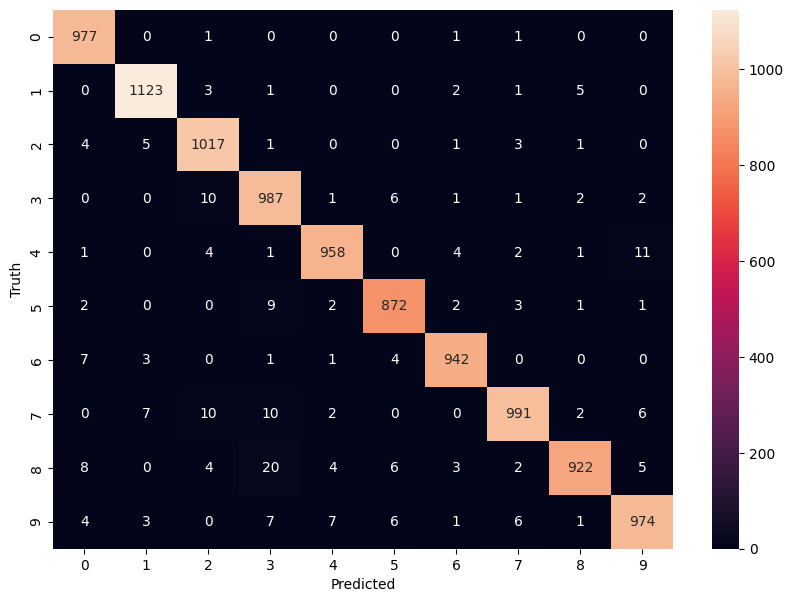

In [27]:
y_predicted=model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="log/", histogram_freq= 1)

model.compile(optimizer ='SGD', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, callbacks= [tb_callback])

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6656 - accuracy: 0.8298
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3394 - accuracy: 0.9051
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2909 - accuracy: 0.9179
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2615 - accuracy: 0.9258
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2401 - accuracy: 0.9325


In [30]:
%load_ext tensorboard
%tensorboard --logdir logs/fit